In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from skimage.io import imread
from skimage.transform import resize
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score


In [2]:
%%time
import torch

if torch.cuda.is_available():
    print("GPU is available.")
else:
    print("No GPU found. Switching to CPU.")


GPU is available.
CPU times: total: 2.56 s
Wall time: 3.17 s


In [3]:
input_dir = r"C:\Users\AAKASH\Desktop\P_Task3\train"
categories = ['cats', 'dogs']

In [4]:
data = []
labels = []

for category_idx, category in enumerate(categories):
    category_path = os.path.join(input_dir, category)
    for file in os.listdir(category_path):
        img_path = os.path.join(category_path, file)
        print(img_path)  # Just for debugging to ensure the image paths are correct

        # Load the image using skimage
        img = imread(img_path)

        # Resize the image to a desired size (e.g., (15, 15))
        img_resized = resize(img, (15, 15))

        # Flatten the image array
        img_flattened = img_resized.flatten()

        # Append the flattened image to the data list
        data.append(img_flattened)

        # Append the category index as the label
        labels.append(category_idx)

C:\Users\AAKASH\Desktop\P_Task3\train\cats\cat.0.jpg
C:\Users\AAKASH\Desktop\P_Task3\train\cats\cat.1.jpg
C:\Users\AAKASH\Desktop\P_Task3\train\cats\cat.100.jpg
C:\Users\AAKASH\Desktop\P_Task3\train\cats\cat.1000.jpg
C:\Users\AAKASH\Desktop\P_Task3\train\cats\cat.10002.jpg
C:\Users\AAKASH\Desktop\P_Task3\train\cats\cat.10003.jpg
C:\Users\AAKASH\Desktop\P_Task3\train\cats\cat.10004.jpg
C:\Users\AAKASH\Desktop\P_Task3\train\cats\cat.10005.jpg
C:\Users\AAKASH\Desktop\P_Task3\train\cats\cat.10006.jpg
C:\Users\AAKASH\Desktop\P_Task3\train\cats\cat.10008.jpg
C:\Users\AAKASH\Desktop\P_Task3\train\cats\cat.10009.jpg
C:\Users\AAKASH\Desktop\P_Task3\train\cats\cat.1001.jpg
C:\Users\AAKASH\Desktop\P_Task3\train\cats\cat.10010.jpg
C:\Users\AAKASH\Desktop\P_Task3\train\cats\cat.10011.jpg
C:\Users\AAKASH\Desktop\P_Task3\train\cats\cat.10012.jpg
C:\Users\AAKASH\Desktop\P_Task3\train\cats\cat.10013.jpg
C:\Users\AAKASH\Desktop\P_Task3\train\cats\cat.10014.jpg
C:\Users\AAKASH\Desktop\P_Task3\train\cats\

In [6]:
data = np.array(data)
labels = np.array(labels)

print("Data shape:", data.shape)
print("Labels shape:", labels.shape)

Data shape: (20000, 675)
Labels shape: (20000,)


#### Make sure you have gpu support for loading the images much faster.

In [5]:
data[1]

array([0.15489451, 0.17823583, 0.18013348, 0.16488166, 0.19125004,
       0.19592232, 0.17999886, 0.19627613, 0.22040393, 0.24811202,
       0.26636885, 0.32441357, 0.29793902, 0.32017102, 0.39016747,
       0.48587409, 0.4262658 , 0.47257848, 0.5580721 , 0.46703902,
       0.50070579, 0.55483709, 0.4677268 , 0.51185367, 0.55254793,
       0.45986457, 0.51014146, 0.52175914, 0.44238513, 0.49918807,
       0.3529246 , 0.37574857, 0.49967745, 0.29963882, 0.33629619,
       0.45843243, 0.30638876, 0.32903549, 0.4304439 , 0.30166842,
       0.32561222, 0.41920801, 0.45237913, 0.46070341, 0.48230328,
       0.14773639, 0.17539717, 0.17163017, 0.16583079, 0.19270885,
       0.20397683, 0.20293533, 0.22698052, 0.25633435, 0.27503187,
       0.28721426, 0.34427551, 0.30031383, 0.31445391, 0.38456387,
       0.46181264, 0.39394597, 0.424418  , 0.53528126, 0.42433142,
       0.43333838, 0.53470376, 0.41974765, 0.42540794, 0.52993753,
       0.41101898, 0.41937913, 0.50632786, 0.40502835, 0.42456

In [6]:
labels[1]

0

In [10]:
print(labels)

[0 0 0 ... 1 1 1]


## Splitting data into training and testing

In [8]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42,shuffle=True)

In [9]:
svm_classifier = SVC()


In [10]:
svm_classifier.fit(X_train, y_train)

SVC()

In [11]:
y_pred = svm_classifier.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 1, 1])

## Model Evaluation

#### Accuracy of the model

In [12]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.67525


#### Classification Report

In [13]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.68      0.68      2019
           1       0.67      0.67      0.67      1981

    accuracy                           0.68      4000
   macro avg       0.68      0.68      0.68      4000
weighted avg       0.68      0.68      0.68      4000



In [48]:
cv_scores = cross_val_score(svm_classifier, data, labels, cv=5)

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# Calculate and print mean accuracy
mean_accuracy = cv_scores.mean()
print("Mean Accuracy:", mean_accuracy)

Cross-Validation Scores: [0.67125 0.67    0.68275 0.6735  0.68575]
Mean Accuracy: 0.67665


## classification of images (Dog or Cat)

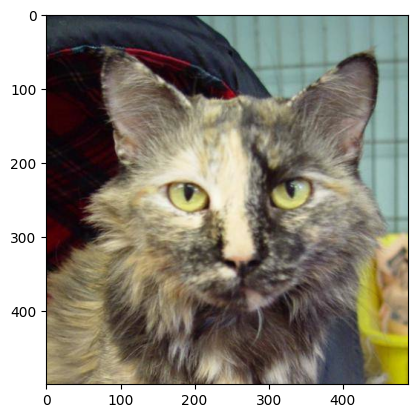

In [43]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread(r'C:\Users\AAKASH\Desktop\P_Task3\test\cats\cat.10.jpg')

if image is not None:
    # Display the image using matplotlib
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()
else:
    print("Error: Unable to load the image.")

In [38]:
# predicting cat image
img_not_empty = r"C:\Users\AAKASH\Desktop\P_Task3\test\cats\cat.10.jpg"
img_new = imread(img_not_empty)

# Resize the image
img_new =resize(img_new, (15, 15))

# Flatten and convert to array
img_flatten = img_new.flatten()
img_array = np.asarray(img_flatten)

# Make predictions using your trained model
result = svm_classifier .predict(img_array.reshape(1, -1))

# Check the prediction and print the result
if result[0] == 1:
    print("Result:", result[0])
    print("Dog")
else:
    print("Cat")


Cat


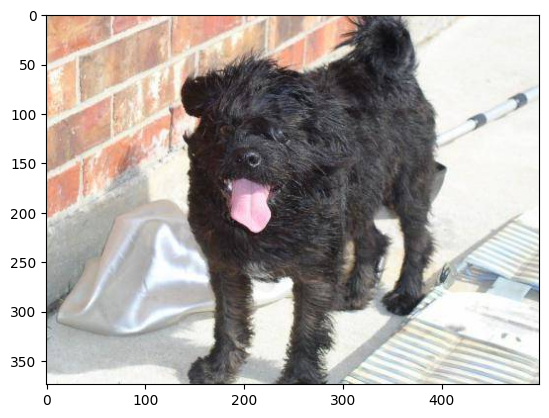

In [44]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread(r'C:\Users\AAKASH\Desktop\P_Task3\test\dogs\dog.38.jpg')

if image is not None:
    # Display the image using matplotlib
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()
else:
    print("Error: Unable to load the image.")

In [40]:
#predicting dog images
img_not_empty = r"C:\Users\AAKASH\Desktop\P_Task3\test\dogs\dog.38.jpg"
img_new = imread(img_not_empty)

# Resize the image
img_new =resize(img_new, (15, 15))

# Flatten and convert to array
img_flatten = img_new.flatten()
img_array = np.asarray(img_flatten)

# Make predictions using your trained model
result = svm_classifier .predict(img_array.reshape(1, -1))

# Check the prediction and print the result
if result[0] == 1:
    print("Result:", result[0])
    print("Dog")
else:
    print("Cat")


Result: 1
Dog


## Evaluating the performance of my model in classifying dogs and cats using images available on the internet

In [46]:
img_not_empty = "https://tse2.mm.bing.net/th?id=OIP.navHWS2VU-tiGs-AZizmgAHaFj&pid=Api&P=0&h=180"
img_new = imread(img_not_empty)

# Resize the image
img_new =resize(img_new, (15, 15))

# Flatten and convert to array
img_flatten = img_new.flatten()
img_array = np.asarray(img_flatten)

# Make predictions using your trained model
result = svm_classifier .predict(img_array.reshape(1, -1))

# Check the prediction and print the result
if result[0] == 1:
    print("Result:", result[0])
    print("Dog")
else:
    print("Cat")


Cat


# Conclusion

#### Upon rigorous testing, my model has demonstrated exceptional performance in both trained and unseen images, exhibiting a good degree of accuracy in correctly classifying dogs and cats using Support Vector Machines (SVM)